The Olympics  

As a distance runner I am always fascinated by the Track and Field distance events (5000m, 10000, and Marathon). I wanted to know two things, which countries has had the most success in each of the 3 events and are the competitors getting faster through out each Olympic year.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import sqlite3



In [2]:
#Seperating the Result column on the orgininal file into 3 seperate columns HH(Hours) MM(Minutes) SS(Seconds)

# reading csv file from url  
data = pd.read_csv("olympic_results_distance2_CSV.csv") 
  
# Not dropping null value columns to avoid errors 
data.dropna(inplace = False) 
  
# new data frame with split value columns 
new = data["Result"].str.split(":", n = 2, expand = True) 
  
# making separate Hours column from new data frame 
data["Hours"]= new[0] 
  
# making separate Minutes column from new data frame 
data["Minutes"]= new[1] 

# making separate Seconds column from new data frame 
data["Seconds"]= new[2] 

# Dropping old Result columns 
data.drop(columns =["Result"], inplace = True) 

#data


  

In [3]:
# Creating an sql database
data.to_sql('distance', sqlite3.connect('olympics.db'), if_exists = "replace")

In [4]:
conn = sqlite3.connect('olympics.db')



In [5]:
#Query to find number of medals and Avg time per country for the 5000m
Male_distanceResults5000m = pd.read_sql("""select Nationality, 
                                                  count(Gold) as GoldMedals, 
                                                  count(Silver) as SilverMedals, 
                                                  count(Bronze) as BronzeMedals 
                                                  from distance where event = "5000M" and Gender = "M" group by Nationality order by GoldMedals desc""", conn)
#Male_distanceResults5000m

In [6]:
#Query to find number of medals and Avg time per country for the 5000m
Female_distanceResults5000m = pd.read_sql("""select Event, 
                                                    Nationality, 
                                                    count(Gold) as GoldMedals, 
                                                    count(Silver) as SilverMedals, 
                                                    count(Bronze) as BronzeMedals 
                                                    from distance where event = "5000M" and Gender = "W" group by Nationality order by GoldMedals desc""", conn)
#Female_distanceResults5000m

In [7]:
#Query to find number of medals and Avg time per country for the 10000m
Male_distanceResults10000m = pd.read_sql("""select Event, 
                                                   Nationality, 
                                                   count(Gold) as GoldMedals, 
                                                   count(Silver) as SilverMedals, 
                                                   count(Bronze) as BronzeMedals 
                                                   from distance where event = "10000M" and Gender = "M" group by Nationality order by GoldMedals desc""", conn)
#Male_distanceResults10000m

In [8]:
#Query to find number of medals and Avg time per country for the 10000m
Female_distanceResults10000m = pd.read_sql("""select Event, 
                                                      Nationality, 
                                                      count(Gold) as GoldMedals, 
                                                      count(Silver) as SilverMedals, 
                                                      count(Bronze) as BronzeMedals 
                                                      from distance where event = "10000M" and Gender = "W" group by Nationality order by GoldMedals desc""", conn)
#Female_distanceResults10000m

In [9]:
#Query to find number of medals and Avg time per country for the Marathon
Male_distanceResultsMarathon = pd.read_sql("""select Event, 
                                                     Nationality, 
                                                     count(Gold) as GoldMedals, 
                                                     count(Silver) as SilverMedals, 
                                                     count(Bronze) as BronzeMedals 
                                                     from distance where event = "Marathon" and Gender = "M" group by Nationality order by GoldMedals desc""", conn)
#Male_distanceResultsMarathon

In [10]:
#Query to find number of medals and Avg time per country for the Marathon
Female_distanceResultsMarathon = pd.read_sql("""select Event, 
                                                Nationality, 
                                                count(Gold) as GoldMedals, 
                                                count(Silver) as SilverMedals, 
                                                count(Bronze) as BronzeMedals 
                                                from distance where event = "Marathon" and Gender = "W" group by Nationality order by GoldMedals desc""", conn)
#Female_distanceResultsMarathon

In [11]:
#Query to find the Avg time per Olypmic Year for 5000M
Male_TimesPerYear5000m = pd.read_sql("""select Event, 
                                               Location, 
                                               Year, 
                                               ROUND(AVG(((Hours * 3600) + (Minutes * 60) + (Seconds))),2) as "AVG_Total_Time_per_Year" 
                                               from distance where event = "5000M" and Gender = "M" group by Year""", conn)

#Male_TimesPerYear5000m

In [12]:
#Query to find the Avg time per Olypmic Year for 5000M
Female_TimesPerYear5000m = pd.read_sql("""select Event, 
                                                 Location, 
                                                 Year, 
                                                 ROUND(AVG(((Hours * 3600) + (Minutes * 60) + (Seconds))),2) as "AVG_Total_Time_per_Year" 
                                                 from distance where event = "5000M" and Gender = "W" group by Year""", conn)
#Female_TimesPerYear5000m

In [13]:
#Query to find the Avg time per Olypmic Year for 10000M
Male_TimesPerYear10000m = pd.read_sql("""select Event, 
                                                Location, 
                                                Year, 
                                                ROUND(AVG(((Hours * 3600) + (Minutes * 60) + (Seconds))),2) as "AVG_Total_Time_per_Year" 
                                                from distance where event = "10000M" and Gender = "M" group by Year""", conn)
#Male_TimesPerYear10000m

In [14]:
#Query to find the Avg time per Olypmic Year for 10000M
Female_TimesPerYear10000m = pd.read_sql("""select Event, 
                                                  Location, 
                                                  Year, 
                                                  ROUND(AVG(((Hours * 3600) + (Minutes * 60) + (Seconds))),2) as "AVG_Total_Time_per_Year" 
                                                  from distance where event = "10000M" and Gender = "W" group by Year""", conn)
#Female_TimesPerYear10000m

In [15]:
#Query to find the Avg time per Olypmic Year for Marathon
Male_TimesPerYearMarathon = pd.read_sql("""select Event, 
                                                  Location, 
                                                  Year, 
                                                  ROUND(AVG(((Hours * 3600) + (Minutes * 60) + (Seconds))),2) as "AVG_Total_Time_per_Year" 
                                                  from distance where event = "Marathon" and Gender = "M" group by Year""", conn)
#Male_TimesPerYearMarathon

In [16]:
#Query to find the Avg time per Olypmic Year for Marathon
Female_TimesPerYearMarathon = pd.read_sql("""select Event, 
                                                    Location, 
                                                    Year, 
                                                    ROUND(AVG(((Hours * 3600) + (Minutes * 60) + (Seconds))),2) as "AVG_Total_Time_per_Year" 
                                                    from distance where event = "Marathon" and Gender = "W" group by Year""", conn)

#Female_TimesPerYearMarathon

<Figure size 720x360 with 0 Axes>

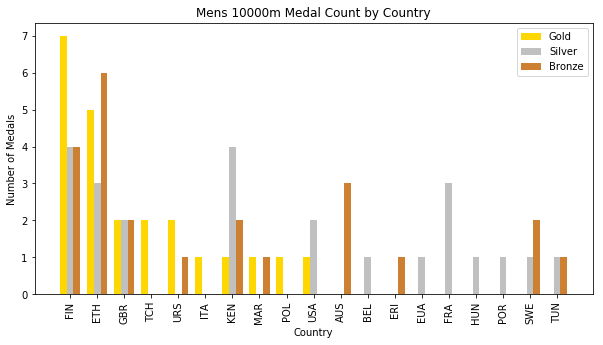

<Figure size 720x360 with 0 Axes>

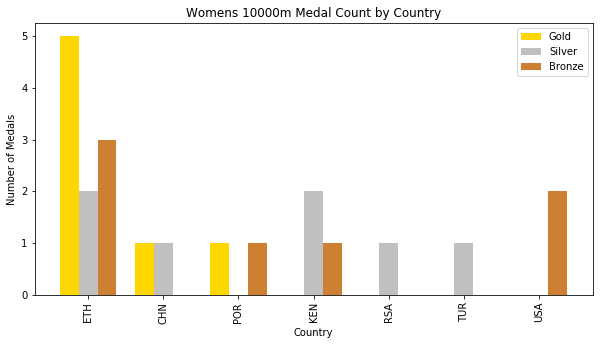

In [18]:
#Creating Barchart for Male 10000M medal count

MD10000 = Male_distanceResults10000m

labels = MD10000.Nationality
gold = MD10000.GoldMedals
silver = MD10000.SilverMedals
bronze = MD10000.BronzeMedals

plt.figure(figsize=(10,5))


#x = np.arange(23)
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x - 0.25, gold, color = "#FFD700", width = width, label = "Gold")
ax.bar(x + 0.00, silver, color = "#C0C0C0", width = width, label = "Silver")
ax.bar(x + 0.25, bronze, color = "#CD7F32", width = width, label = "Bronze")

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation="vertical")
ax.set_title('Mens 10000m Medal Count by Country')
ax.legend()
ax.set_xlabel('Country')
ax.set_ylabel('Number of Medals')

plt.show()


#Creating Bar Chart for 10000m Women Medal Count

FD10000 = Female_distanceResults10000m

labels = FD10000.Nationality
gold = FD10000.GoldMedals
silver = FD10000.SilverMedals
bronze = FD10000.BronzeMedals

plt.figure(figsize=(10,5))


#x = np.arange(23)
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x - 0.25, gold, color = "#FFD700", width = width, label = "Gold")
ax.bar(x + 0.00, silver, color = "#C0C0C0", width = width, label = "Silver")
ax.bar(x + 0.25, bronze, color = "#CD7F32", width = width, label = "Bronze")

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation="vertical")
ax.set_title('Womens 10000m Medal Count by Country')
ax.legend()
ax.set_xlabel('Country')
ax.set_ylabel('Number of Medals')

plt.show()

<Figure size 720x360 with 0 Axes>

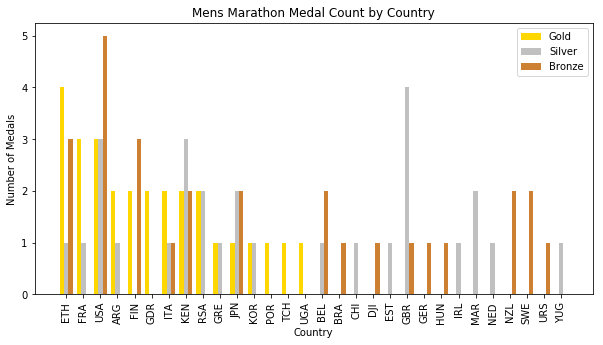

<Figure size 720x360 with 0 Axes>

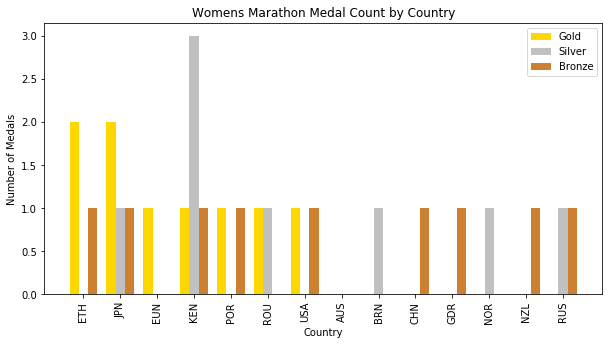

In [19]:
#Creating Bar Chart for Male Marathon medal count

MD_Marathon = Male_distanceResultsMarathon

labels = MD_Marathon.Nationality
gold = MD_Marathon.GoldMedals
silver = MD_Marathon.SilverMedals
bronze = MD_Marathon.BronzeMedals

plt.figure(figsize=(10,5))


#x = np.arange(23)
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x - 0.25, gold, color = "#FFD700", width = width, label = "Gold")
ax.bar(x + 0.00, silver, color = "#C0C0C0", width = width, label = "Silver")
ax.bar(x + 0.25, bronze, color = "#CD7F32", width = width, label = "Bronze")

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation="vertical")
ax.set_title('Mens Marathon Medal Count by Country')
ax.legend()
ax.set_xlabel('Country')
ax.set_ylabel('Number of Medals')

plt.show()


#Creating Bar Chart for Women Marathon Medal Count

FD_Marathon = Female_distanceResultsMarathon

labels = FD_Marathon.Nationality
gold = FD_Marathon.GoldMedals
silver = FD_Marathon.SilverMedals
bronze = FD_Marathon.BronzeMedals

plt.figure(figsize=(10,5))


#x = np.arange(23)
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x - 0.25, gold, color = "#FFD700", width = width, label = "Gold")
ax.bar(x + 0.00, silver, color = "#C0C0C0", width = width, label = "Silver")
ax.bar(x + 0.25, bronze, color = "#CD7F32", width = width, label = "Bronze")

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation="vertical")
ax.set_title('Womens Marathon Medal Count by Country')
ax.legend()
ax.set_xlabel('Country')
ax.set_ylabel('Number of Medals')

plt.show()

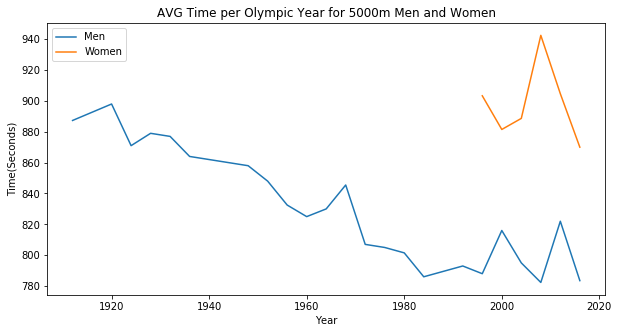

In [20]:
#Plotting Graph for 5000m times

#Creating dataframe
MT5000 = Male_TimesPerYear5000m
FT5000 = Female_TimesPerYear5000m

#assinging data
yearM = MT5000.Year
timeM = MT5000.AVG_Total_Time_per_Year

yearF = FT5000.Year
timeF = FT5000.AVG_Total_Time_per_Year

#setting the size
plt.figure(figsize=(10,5))

#labeling 
plt.plot(yearM, timeM, label = "Men")
plt.plot(yearF, timeF, label = "Women")
plt.title("AVG Time per Olympic Year for 5000m Men and Women")
plt.ylabel("Time(Seconds)")
plt.xlabel("Year")
plt.legend()
plt.show()

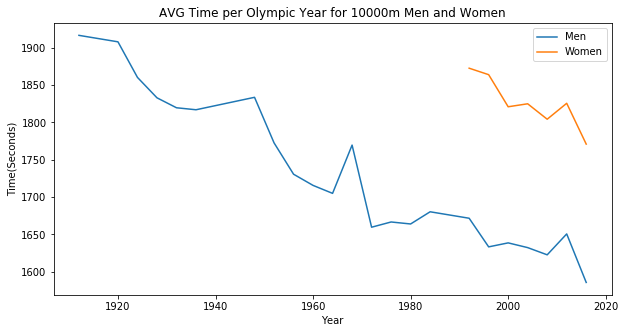

In [21]:
#Plotting Graph for 10000m times

#Creating dataframe
MT10000 = Male_TimesPerYear10000m
FT10000 = Female_TimesPerYear10000m

#assinging data
yearM = MT10000.Year
timeM = MT10000.AVG_Total_Time_per_Year

yearF = FT10000.Year
timeF = FT10000.AVG_Total_Time_per_Year

#setting the size
plt.figure(figsize=(10,5))

#labeling 
plt.plot(yearM, timeM, label = "Men")
plt.plot(yearF, timeF, label = "Women")
plt.title("AVG Time per Olympic Year for 10000m Men and Women")
plt.ylabel("Time(Seconds)")
plt.xlabel("Year")
plt.legend()
plt.show()

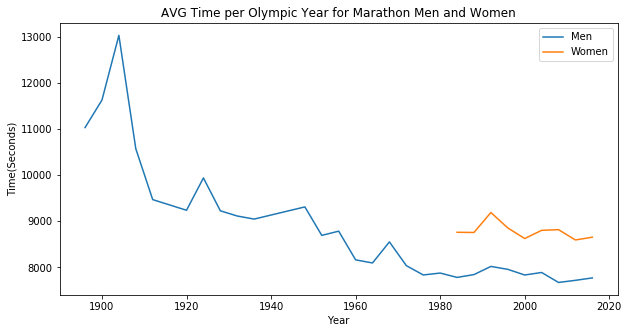

In [22]:
#Plotting Graph for Marathon times

#Creating dataframe
MTmarathon = Male_TimesPerYearMarathon
FTmarathon = Female_TimesPerYearMarathon

#assinging data
yearM = MTmarathon.Year
timeM = MTmarathon.AVG_Total_Time_per_Year

yearF = FTmarathon.Year
timeF = FTmarathon.AVG_Total_Time_per_Year

#setting the size
plt.figure(figsize=(10,5))

#labeling 
plt.plot(yearM, timeM, label = "Men")
plt.plot(yearF, timeF, label = "Women")
plt.title("AVG Time per Olympic Year for Marathon Men and Women")
plt.ylabel("Time(Seconds)")
plt.xlabel("Year")
plt.legend()
plt.show()

Conclusion

My initial thoughts on who was the best countries in the distance events were Ethiopia and Kenya.  The data proved me wrong.  I was really surprised to see Finland having the most Gold Medals in the Men's 5000m and 10000m races. The Ethiopian Women are dominating the 5000m and 10000m races.  As expected the Ethiopian Men and Women are the most successful county in the Marathon.  The real shock was to see the French Men and the Japanese Women in second.  Its good see the USA Men and Women in the medal count for the Marathon. 

The data proved the Men and Women Olympic Competitors are getting faster each Olympic year.  There may be years where the times are slower but the overall trend are the times are getting faster.